# Setting up the workspace

## Importing the necessary modules

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Setting working directory

In [2]:
os.chdir('/Users/lewyiliang/Library/CloudStorage/OneDrive-SIM-SingaporeInstituteofManagement/Year 2/ST2195 - Programming for Data Science/Coursework/dataverse_files')
os.getcwd()  # Prints the current working directory

'/Users/lewyiliang/Library/CloudStorage/OneDrive-SIM-SingaporeInstituteofManagement/Year 2/ST2195 - Programming for Data Science/Coursework/dataverse_files'

## Connecting to coursework_py database

In [3]:
conn = sqlite3.connect('/Users/lewyiliang/Library/CloudStorage/OneDrive-SIM-SingaporeInstituteofManagement/Year 2/ST2195 - Programming for Data Science/Coursework/dataverse_files/coursework_py.db')

## Data Wrangling

In [4]:
# Checking and dealing with anomalies in data set
airports_check = pd.read_sql_query("""
                                   SELECT iata FROM airports
                                   """, conn)

In [5]:
airports_check['iata'].isnull().sum()

0

# 3. How does the number of people flying between different locations change over time?


## Part 1: Top 10 air traffic volume for airports

In [6]:
# Identifying the top 10 air traffic volume for airports 
q3_airport_traffic = pd.read_sql_query("""
                                       SELECT airports.airport, airports.iata, COUNT(*)
                                       FROM ontime JOIN airports ON ontime.Dest = airports.iata
                                       WHERE Cancelled = 0 AND Diverted = 0
                                       GROUP BY airports.airport
                                       ORDER BY COUNT(*) DESC LIMIT 10
                                       """, conn)

In [7]:
# Changing the column names of q3_airport_traffic
q3_airport_traffic.columns = ["Airport", "IATA Code", "Number of Flights"]

# Print the output of q3_airport_traffic
print(q3_airport_traffic)

# Number of flights of the top 10 airports
print(q3_airport_traffic["Number of Flights"].sum()) # 7,124,177 flights from the top 10 airports

                             Airport IATA Code  Number of Flights
0  William B Hartsfield-Atlanta Intl       ATL            1215952
1       Chicago O'Hare International       ORD            1044214
2    Dallas-Fort Worth International       DFW             882535
3          Los Angeles International       LAX             692660
4                        Denver Intl       DEN             644311
5       George Bush Intercontinental       IAH             624824
6   Phoenix Sky Harbor International       PHX             592496
7             McCarran International       LAS             530957
8                        Newark Intl       EWR             450674
9                Salt Lake City Intl       SLC             445554
7124177


In [8]:
# Obtaining data needed to visualize the flight volumes for the top 10 airports
q3p1 = pd.read_sql_query("""
                         SELECT airports.airport, airports.iata, COUNT(*) AS NumOfFlights, ontime.Year, ontime.Month
                         FROM ontime JOIN airports ON ontime.Dest = airports.iata
                         WHERE Cancelled = 0 AND Diverted = 0 
                         GROUP BY airports.airport, ontime.Year, ontime.Month 
                         ORDER BY airports.airport, ontime.Year, ontime.Month
                         """, conn)

In [9]:
# Changing the column names of q3p1
q3p1.columns = ["Airport", "IATA Code", "Number of Flights", "Year", "Month"]

# Create a new variable that combines the Year and Month columns
q3p1["YearMonth"] = pd.to_datetime(q3p1["Year"].astype(str) + q3p1["Month"].astype(str).str.zfill(2) + "01", format="%Y%m%d")

# To check the total number of flights
print(q3p1["Number of Flights"].sum())

21271928


In [10]:
# Obtaining the number of flights for the top 10 airports
top_airports = q3p1.groupby("Airport")["Number of Flights"].sum().sort_values(ascending=False).head(10).index.tolist()
q3p1_top10 = q3p1[q3p1["Airport"].isin(top_airports)]

# Number of flights of the top 10 airports
print(q3p1_top10["Number of Flights"].sum())

7124177


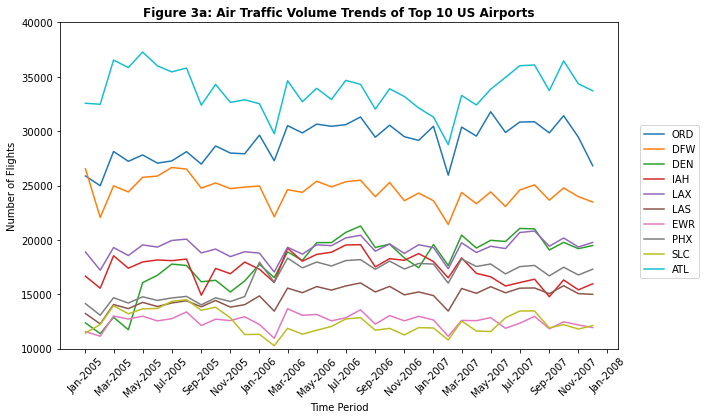

In [11]:
# Create a list of months to exclude
exclude_months = pd.date_range(start='2005-01-01', end='2007-12-31', freq='MS')

# Create a MonthLocator object with a frequency of 2 months, excluding the months in exclude_months
locator = mdates.MonthLocator(bymonth=(1, 3, 5, 7, 9, 11))

# Create a DateFormatter object with the desired format
formatter = mdates.DateFormatter('%b-%Y')

# Create a line chart of the top 10 airports from 2005 to 2007
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='Number of Flights', hue='IATA Code', data=q3p1_top10)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Figure 3a: Air Traffic Volume Trends of Top 10 US Airports', fontweight='bold')
plt.xlabel('Time Period')
plt.ylabel('Number of Flights')
plt.ylim(10000, 40000)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 0.7))
plt.show()

## Part 2: Top 10 air traffic volume for states

In [12]:
# Identifying the top 10 air traffic volume for states
q3_state_traffic = pd.read_sql_query("""
                                     SELECT airports.state, airports.iata, COUNT(*)
                                     FROM ontime JOIN airports ON ontime.Dest = airports.iata
                                     WHERE Cancelled = 0 AND Diverted = 0
                                     GROUP BY airports.state
                                     ORDER BY COUNT(*) DESC LIMIT 10
                                     """, conn)

In [13]:
# Changing the column names of q3_state_traffic
q3_state_traffic.columns = ["State", "IATA Code", "Number of Flights"]

# Printing the output of q3_state_traffic
print(q3_state_traffic)

# Number of flights of the top 10 airports
print(q3_state_traffic["Number of Flights"].sum()) # 12,697,714 flights from the top 10 states

  State IATA Code  Number of Flights
0    CA       SFO            2539762
1    TX       SAT            2348659
2    IL       ORD            1388950
3    FL       MIA            1380626
4    GA       ATL            1281079
5    NY       BUF             982808
6    CO       DEN             746647
7    VA       IAD             735683
8    AZ       PHX             676107
9    NV       RNO             617393
12697714


In [14]:
# Obtaining data needed to visualize the flight volumes for the top 10 states
q3p2 = pd.read_sql_query("""
                         SELECT airports.state, airports.iata, COUNT(*) AS NumOfFlights, ontime.Year, ontime.Month 
                         FROM ontime JOIN airports ON ontime.Dest = airports.iata 
                         WHERE Cancelled = 0 AND Diverted = 0 
                         GROUP BY airports.state, ontime.Year, ontime.Month 
                         ORDER BY airports.state, ontime.Year, ontime.Month
                         """, conn)

In [15]:
# Changing the column names of q3p2 
q3p2.columns = ["State", "IATA Code", "Number of Flights", "Year", "Month"]

# Create a new variable that combines the Year and Month columns
q3p2["YearMonth"] = pd.to_datetime(q3p2["Year"].astype(str) + q3p2["Month"].astype(str).str.zfill(2) + "01", format="%Y%m%d")

# To check the total number of flights
print(q3p2["Number of Flights"].sum()) # 21,257,880 flights

21271928


In [16]:
# Obtaining the number of flights for the top 10 airports
top_states = q3p2.groupby("State")["Number of Flights"].sum().sort_values(ascending=False).head(10).index.tolist()
q3p2_top10 = q3p2[q3p2["State"].isin(top_states)]

# Number of flights of the top 10 airports
print(q3p2_top10["Number of Flights"].sum())

12697714


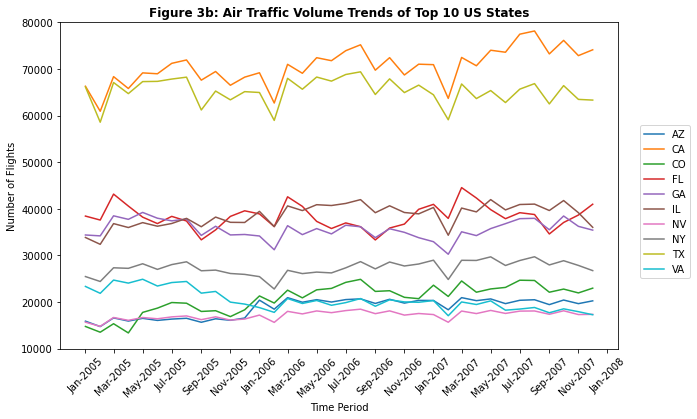

In [17]:
# Create a list of months to exclude
exclude_months = pd.date_range(start='2005-01-01', end='2007-12-31', freq='MS')

# Create a MonthLocator object with a frequency of 2 months, excluding the months in exclude_months
locator = mdates.MonthLocator(bymonth=(1, 3, 5, 7, 9, 11))

# Create a DateFormatter object with the desired format
formatter = mdates.DateFormatter('%b-%Y')

# Create a line chart of the top 10 states from 2005 to 2007
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='Number of Flights', hue='State', data=q3p2_top10)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Figure 3b: Air Traffic Volume Trends of Top 10 US States', fontweight='bold')
plt.xlabel('Time Period')
plt.ylabel('Number of Flights')
plt.ylim(10000, 80000)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 0.7))
plt.show()

## Part 3: Top 10 air traffic volume for cities

In [18]:
# Identifying the top 10 air traffic volume for cities
q3_city_traffic = pd.read_sql_query("""
                                    SELECT airports.city, airports.iata, COUNT(*)
                                    FROM ontime JOIN airports ON ontime.Dest = airports.iata
                                    WHERE Cancelled = 0 AND Diverted = 0
                                    GROUP BY airports.city
                                    ORDER BY COUNT(*) DESC LIMIT 10
                                    """, conn)

In [19]:
# Changing the column names of q3_city_traffic
q3_city_traffic.columns = ["City", "IATA Code", "Number of Flights"]

# Printing the output of q3_city_traffic
print(q3_city_traffic)

# Number of flights of the top 10 cities
print(q3_city_traffic["Number of Flights"].sum()) # 7,818,747 flights from the top 10 cities

                City IATA Code  Number of Flights
0            Chicago       ORD            1329774
1            Atlanta       ATL            1215952
2  Dallas-Fort Worth       DFW             882535
3            Houston       IAH             789456
4        Los Angeles       LAX             692660
5           New York       LGA             689932
6             Denver       DEN             644311
7            Phoenix       PHX             592496
8          Las Vegas       LAS             530957
9             Newark       EWR             450674
7818747


In [20]:
# Obtaining data needed to visualize the flight volumes for the top 10 cities
q3p3 = pd.read_sql_query("""
                         SELECT airports.city, airports.iata, COUNT(*) AS NumOfFlights, ontime.Year, ontime.Month
                         FROM ontime JOIN airports ON ontime.Dest = airports.iata 
                         WHERE Cancelled = 0 AND Diverted = 0 
                         GROUP BY airports.city, ontime.Year, ontime.Month 
                         ORDER BY airports.city, ontime.Year, ontime.Month
                         """, conn)

In [21]:
# Changing the column names of q3
q3p3.columns = ["City", "IATA Code", "Number of Flights", "Year", "Month"]

# Create a new variable that combines the Year and Month columns
q3p3["YearMonth"] = pd.to_datetime(q3p3["Year"].astype(str) + q3p3["Month"].astype(str).str.zfill(2) + "01", format="%Y%m%d")

# To check the total number of flights
print(q3p3["Number of Flights"].sum()) # 21,257,880 flights

21271928


In [22]:
# Obtaining the number of flights for the top 10 cities
top_cities = q3p3.groupby("City")["Number of Flights"].sum().sort_values(ascending=False).head(10).index.tolist()
q3p3_top10 = q3p3[q3p3["City"].isin(top_cities)]

# Number of flights of the top 10 cities
print(q3p3_top10["Number of Flights"].sum()) # 7,818,747 flights

7818747


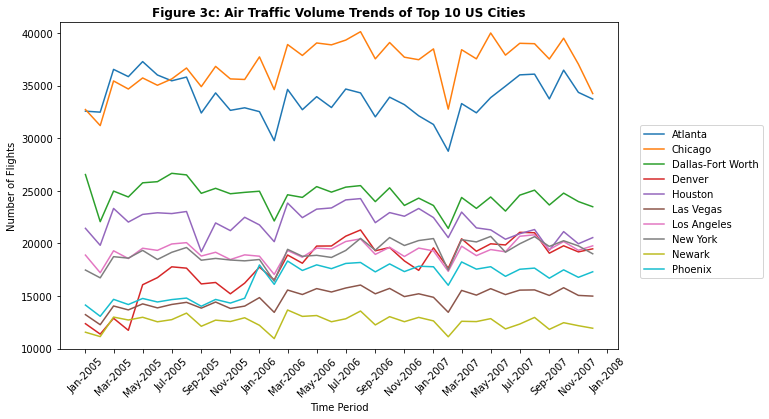

In [23]:
# Create a list of months to exclude
exclude_months = pd.date_range(start='2005-01-01', end='2007-12-31', freq='MS')

# Create a MonthLocator object with a frequency of 2 months, excluding the months in exclude_months
locator = mdates.MonthLocator(bymonth=(1, 3, 5, 7, 9, 11))

# Create a DateFormatter object with the desired format
formatter = mdates.DateFormatter('%b-%Y')

# Create a line chart of the top 10 cities from 2005 to 2007
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='Number of Flights', hue='City', data=q3p3_top10)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Figure 3c: Air Traffic Volume Trends of Top 10 US Cities', fontweight='bold')
plt.xlabel('Time Period')
plt.ylabel('Number of Flights')
plt.ylim(10000, 41000)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 0.7))
plt.show()

## Part 4: Top 10 air traffic volume for flight routes

In [24]:
c = conn.cursor()

In [25]:
# Adding a new column named "Route"
c.execute("ALTER TABLE ontime ADD Route")
conn.commit()

In [26]:
# Grouping flight routes based on their origin and destination
c.execute("UPDATE ontime SET Route = Origin || '-' || Dest")
conn.commit()

In [27]:
# Identifying the top 10 air traffic volume for cities
q3_route_traffic = pd.read_sql_query("""
                                    SELECT ontime.Origin, ontime.Dest, COUNT(*) AS NumOfFlights
                                    FROM ontime
                                    WHERE Cancelled = 0 AND Diverted = 0
                                    GROUP BY ontime.Origin, ontime.Dest
                                    ORDER BY NumOfFlights DESC
                                    LIMIT 10
                                    """, conn)

In [28]:
# Changing the column names of q3_route_traffic
q3_route_traffic.columns = ["Flight Route", "IATA Code", "Number of Flights"]

# Printing the output of q3_route_traffic
print(q3_route_traffic)

# Number of flights of the top 10 flight routes
print(q3_route_traffic["Number of Flights"].sum()) # 375,850 flights from the top 10 flight routes

  Flight Route IATA Code  Number of Flights
0          LAX       SAN              41891
1          SAN       LAX              41813
2          LAX       LAS              39882
3          LAS       LAX              38859
4          OGG       HNL              36660
5          HNL       OGG              36569
6          BOS       LGA              35748
7          LGA       BOS              35715
8          LGA       DCA              34365
9          DCA       LGA              34348
375850


In [29]:
# Get data for top 10 flight routes
q3p4 = pd.read_sql_query("""
                         SELECT Route, COUNT(*) AS NumOfFlights, ontime.Year, ontime.Month 
                         FROM ontime 
                         WHERE Cancelled = 0 AND Diverted = 0 
                         GROUP BY Route, Year, Month 
                         ORDER BY Route, Year, Month
                         """, conn)

In [30]:
# Changing the column names of q3p4
q3p4.columns = ["Flight Routes", "Number of Flights", "Year", "Month"]

# Create a new variable that combines the Year and Month columns
q3p4["YearMonth"] = pd.to_datetime(q3p4["Year"].astype(str) + q3p4["Month"].astype(str).str.zfill(2) + "01", format="%Y%m%d")

# To check the total number of flights
print(q3p4["Number of Flights"].sum()) # 21,271,928 flights

21271928


In [31]:
# Obtaining the number of flights for the top 10 flight routes
top_flight_routes = q3p4.groupby("Flight Routes")["Number of Flights"].sum().sort_values(ascending=False).head(10).index.tolist()
q3p4_top10 = q3p4[q3p4["Flight Routes"].isin(top_flight_routes)]

# Number of flights of the top 10 flight routes
print(q3p4_top10["Number of Flights"].sum()) # 375,850 flights

375850


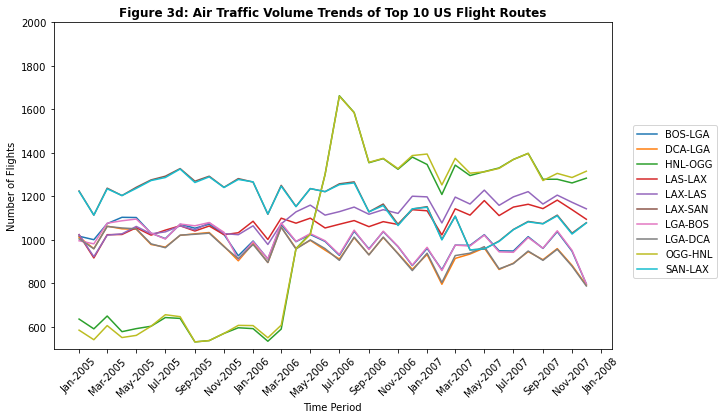

In [32]:
# Create a list of months to exclude
exclude_months = pd.date_range(start='2005-01-01', end='2007-12-31', freq='MS')

# Create a MonthLocator object with a frequency of 2 months, excluding the months in exclude_months
locator = mdates.MonthLocator(bymonth=(1, 3, 5, 7, 9, 11))

# Create a DateFormatter object with the desired format
formatter = mdates.DateFormatter('%b-%Y')

# Create a line chart of the top 10 flight routes from 2005 to 2007
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='Number of Flights', hue='Flight Routes', data=q3p4_top10)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Figure 3d: Air Traffic Volume Trends of Top 10 US Flight Routes', fontweight='bold')
plt.xlabel('Time Period')
plt.ylabel('Number of Flights')
plt.ylim(500, 2000)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 0.7))
plt.show()

## Close the database connection

In [33]:
conn.close()